# PREVENDO O APARECIMENTO DE DIABETES (LOGISTIC REGRESSION)

> *Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. Seu objetivo é prever se um paciente tem diabetes ou não, com base em certas medidas diagnósticas incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de herança indígena Pima.*

<br>

Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 1. CARREGAR PACOTES E IMPORTAR OS DADOS

In [1]:
# Carregando os pacotes
library(caret)
library(ROCR) 
library(e1071)
library(tidyverse)
library(gridExtra)
library(pROC)
library(precrec)
library(corrplot)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ROCR' was built under R version 3.6.3"Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.4     
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x

In [2]:
# Carregando o dataset um um dataframe
df_diabetes<- read.csv("diabetes.csv")

In [3]:
# Sumário dos dados
summary(df_diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [4]:
# Visualizar as seis primeiras linhas
head(df_diabetes)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [5]:
# Visualizar as seis últimas linhas
tail(df_diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,9,89,62,0,0,22.5,0.142,33,0
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Visualização geral dos dados
glimpse(df_diabetes)

Rows: 768
Columns: 9
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, ~
$ Glucose                  <int> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125~
$ BloodPressure            <int> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74~
$ SkinThickness            <int> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, ~
$ Insulin                  <int> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, ~
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.~
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2~
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 3~
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ~


In [7]:
# Checar Nas
sapply(df_diabetes, function(x) sum(is.na(x)))

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

## 2. LIMPEZA, TRANSFORMAÇÃO E ANÁLISE EXPLORATÓRIA DOS DADOS

### 2.1 Dicionário das Variáveis

**Pregnancies:** Número de vezes que engravidou<br>
**Glucose:** Concentração de glicose plasmática após duas horas do teste<br>
**BloodPressure:** Pressão arterial diastólica (mm Hg)<br>
**SkinThickness:** Espessura da dobra de pele do tríceps (mm)<br>
**Insulin:** Insulina sérica após 2 horas do teste<br>
**BMI:** Índice de massa corporal<br>
**DiabetesPedigreeFunction:** Função que mede tendência a partir do histórico familiar<br>
**Age:** Idade<br>
**Outcome:** variável dependente (0 e 1)<br>

### 2.2 Variáveis

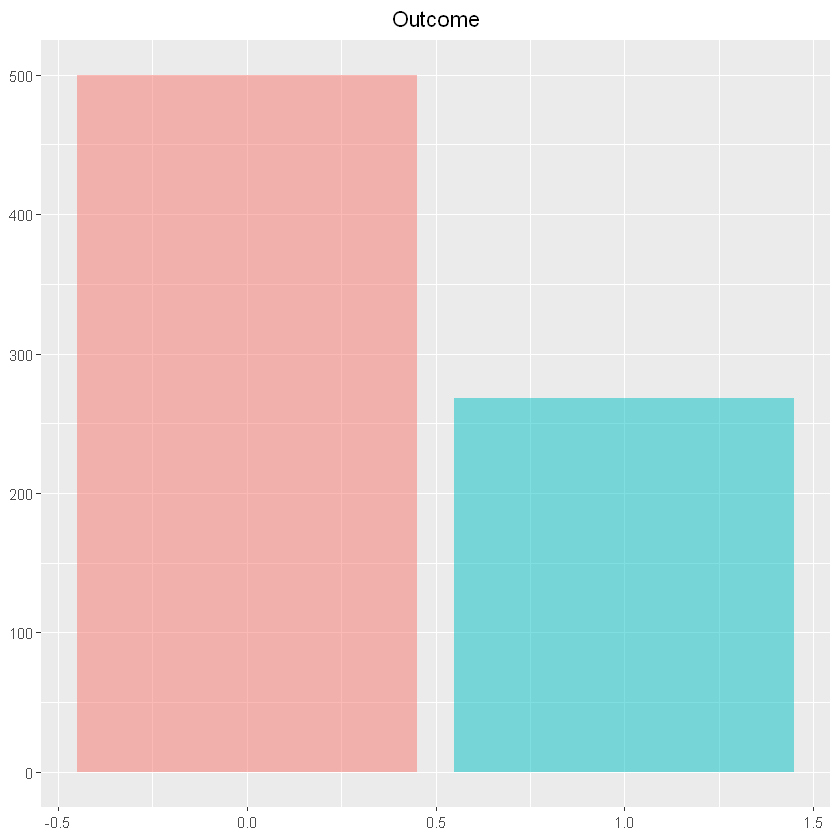

In [8]:
# Plotar variável Outcome (dependente)
df_diabetes %>%
ggplot(aes(Outcome,fill=as.factor(Outcome))) +
geom_bar(alpha=.5,show.legend=F) +
labs(title="Outcome",x=NULL,y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [9]:
# Plotar variável Pregnancies
plot1<-df_diabetes %>%
ggplot(aes(as.factor(Pregnancies),fill=as.factor(Pregnancies))) +
geom_bar(show.legend=F,alpha=.5) +
labs(title="Pregnancies",y=NULL,x=NULL) +
theme(plot.title = element_text(hjust = 0.5))

In [10]:
# Plotar variável Glucose
plot2<-df_diabetes %>%
ggplot(aes(Glucose)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Glucose",x=NULL,y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [11]:
# Plotar variável BloodPressure
plot3<-df_diabetes %>%
ggplot(aes(BloodPressure)) +
geom_histogram(fill = "blue", color = "yellow", alpha = .5, bins = 40, boundary = 5) +
labs(title="Blood Pressure",x=NULL,y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

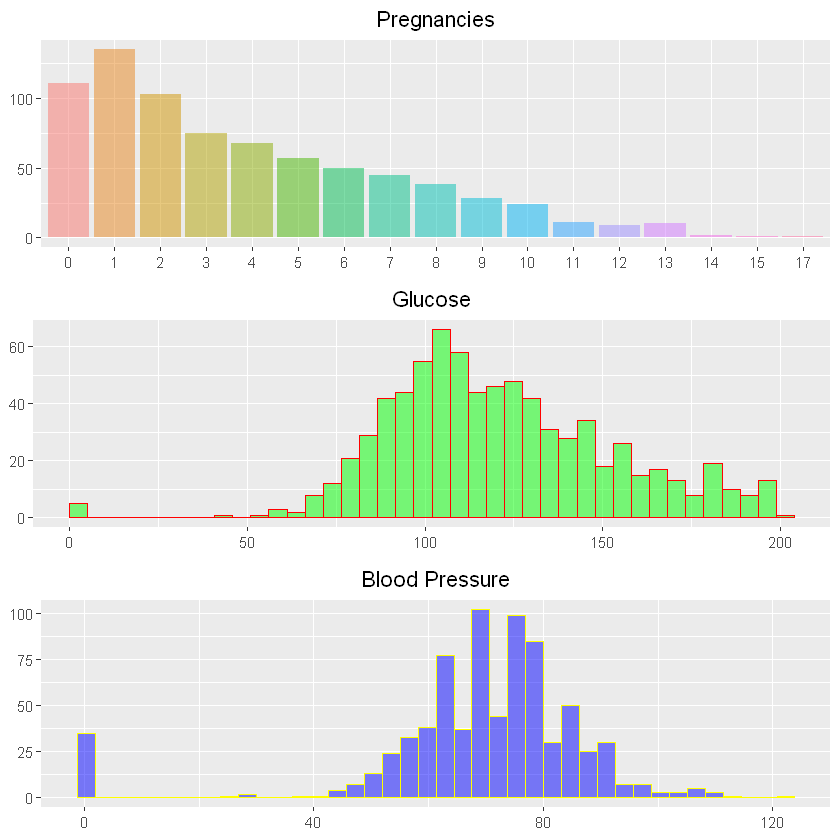

In [12]:
grid.arrange(plot1,plot2,plot3)

In [13]:
# Plotar variável SkinThickness
plot4<-df_diabetes %>%
ggplot(aes(SkinThickness)) +
geom_histogram(fill = "green", color = "blue", alpha = .5, bins = 40, boundary = 5) +
labs(title="Skin Thickness",x=NULL,y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [14]:
# Plotar variável Insulin
plot5<-df_diabetes %>%
ggplot(aes(Insulin)) +
geom_histogram(fill = "blue", color = "yellow", alpha = .5, bins = 40, boundary = 5) +
labs(title="Insulin",x=NULL,y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [15]:
# Plotar variável BMI
plot6<-df_diabetes %>%
ggplot(aes(BMI)) +
geom_histogram(fill = "lightblue", color = "purple", alpha = .5, bins = 40, boundary = 5) +
labs(title="BMI",x=NULL,y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

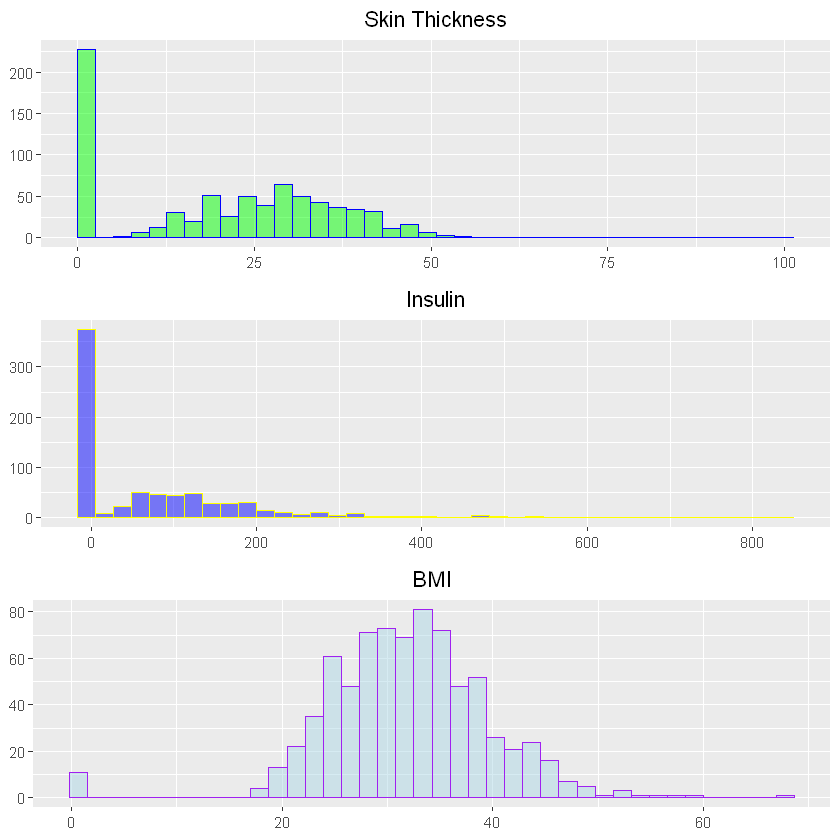

In [16]:
grid.arrange(plot4,plot5,plot6)

In [17]:
# Plotar variável DiabetesPedigreeFunction
plot7<-df_diabetes %>%
ggplot(aes(DiabetesPedigreeFunction)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Diabetes Pedigree Function",x=NULL,y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

In [18]:
# Plotar variável Age
plot8<-df_diabetes %>%
ggplot(aes(Age)) +
geom_histogram(fill = "green", color = "purple", alpha = .5, bins = 40, boundary = 5) +
labs(title="Age",x=NULL,y=NULL)+
theme(plot.title = element_text(hjust = 0.5))

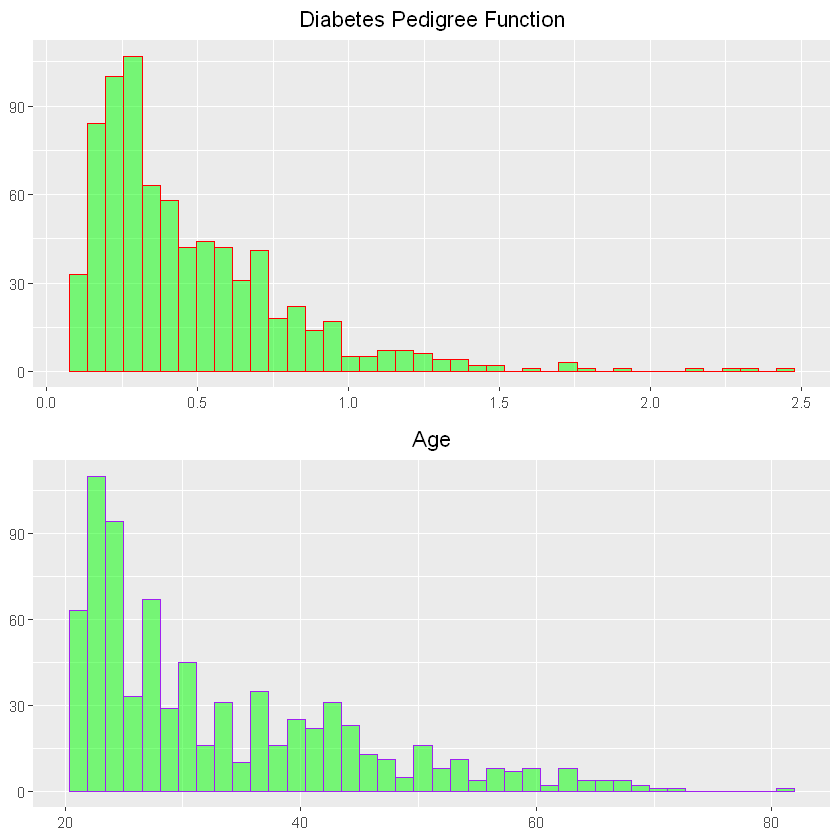

In [19]:
grid.arrange(plot7,plot8)

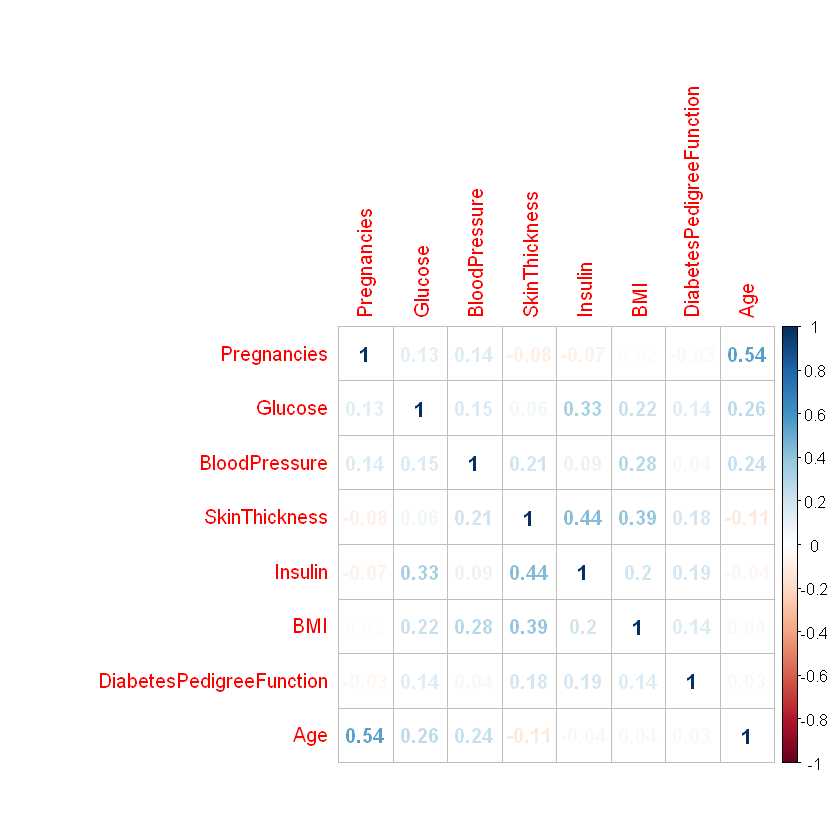

In [20]:
# Plotando correlação
corrplot(cor(df_diabetes[,-9]),method="number")

### 2.3 Limpando e Transformando Variáveis

**Algumas variáveis possuem valores estranhos e devemos tomar uma decisão sobre como proceder**

* Pregnancies: uma observação possui o valor de 17. Embora seja incomum, é possível que uma mulher tenha 17 gravidezes. Optamos por não realizar nenhum procedimento.
* As variáveis Glucose (5), Bloodpressure (35), SkinThickness (227), Insulin (374) e BMI (11) possuem observações com valor zero. Dado suas características devemos realizar alterações. Iremos substituir os valores zero pela sua média.


In [21]:
# Remover valores zero
df_diabetes<-df_diabetes%>%
mutate(Outcome=Outcome,Glucose=ifelse(Glucose==0,mean(Glucose,na.rm=T),Glucose),
       BMI=ifelse(BMI==0,mean(BMI,na.rm=T),BMI),
       BloodPressure=ifelse(BloodPressure==0,mean(BloodPressure,na.rm=T),BloodPressure),
       SkinThickness=ifelse(SkinThickness==0,mean(SkinThickness,na.rm=T),SkinThickness),
       Insulin=ifelse(Insulin==0,mean(Insulin,na.rm=T),Insulin))

In [22]:
# Visão geral dos dados
glimpse(df_diabetes)

Rows: 768
Columns: 9
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, ~
$ Glucose                  <dbl> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125~
$ BloodPressure            <dbl> 72.00000, 66.00000, 64.00000, 66.00000, 40.00~
$ SkinThickness            <dbl> 35.00000, 29.00000, 20.53646, 23.00000, 35.00~
$ Insulin                  <dbl> 79.79948, 79.79948, 79.79948, 94.00000, 168.0~
$ BMI                      <dbl> 33.60000, 26.60000, 23.30000, 28.10000, 43.10~
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2~
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 3~
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ~


In [23]:
# Transformando variáveis em fatores
to.factors <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- as.factor(df[[variable]])
  }
  return(df)
}

In [24]:
# Normalização
scale.features <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- scale(df[[variable]], center = T, scale = T)
  }
  return(df)
}

In [25]:
# Normalizando as variáveis
numeric.vars <- c('Pregnancies','Glucose','BloodPressure','SkinThickness',
                  'Insulin','BMI','DiabetesPedigreeFunction','Age')
df_diabetes_scaled <- scale.features(df_diabetes, numeric.vars)

In [26]:
# Variáveis do tipo fator
categorical.vars <- "Outcome"

In [27]:
# Aplicando as conversões ao dataset
df_diabetes2 <- to.factors(df_diabetes_scaled, variables = categorical.vars )

In [28]:
# Visualizar dados pré-processados
head(df_diabetes2)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.6395305,0.8647122,-0.0210307,0.8714890,-0.4174961,0.1671465,0.4681869,1.42506672,1
-0.8443348,-1.2052039,-0.5162464,0.2485163,-0.4174961,-0.8509800,-0.3648230,-0.19054773,0
1.2330766,2.0146656,-0.6813183,-0.6302429,-0.4174961,-1.3309539,0.6040037,-0.10551539,1
-0.8443348,-1.0737807,-0.5162464,-0.3744563,-0.2649341,-0.6328100,-0.9201630,-1.04087112,0
-1.1411079,0.5032983,-2.6621813,0.8714890,0.5300779,1.5488896,5.4813370,-0.02048305,1
0.3427574,-0.1866737,0.1440412,-0.6302429,-0.4174961,-0.9964266,-0.8175458,-0.27558007,0


## 3. MODELOS

In [29]:
# Preparando os dados de treino e de teste
indexes <- sample(1:nrow(df_diabetes2), size = 0.6 * nrow(df_diabetes2))
train.data <- df_diabetes2[indexes,]
test.data <- df_diabetes2[-indexes,]

In [30]:
# Separando os atributos e as classes
test.feature.vars <- test.data[,-9]
test.class.var <- test.data[,9]

### Modelo 1

* O Modelo 1 tem a variável Outcome como dependente e as restantes como independentes.

In [31]:
# Construindo o modelo de regressão logística
modelo_v1 <- glm(Outcome ~., train.data, family = "binomial")


In [32]:
# Visualizando os detalhes do modelo
summary(modelo_v1)


Call:
glm(formula = Outcome ~ ., family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8281  -0.6561  -0.3324   0.6238   2.3079  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.02011    0.13576  -7.514 5.73e-14 ***
Pregnancies               0.60451    0.14820   4.079 4.52e-05 ***
Glucose                   1.20838    0.15694   7.700 1.36e-14 ***
BloodPressure            -0.08131    0.14504  -0.561  0.57507    
SkinThickness             0.03590    0.14549   0.247  0.80508    
Insulin                  -0.18918    0.14937  -1.267  0.20533    
BMI                       0.76364    0.16757   4.557 5.19e-06 ***
DiabetesPedigreeFunction  0.41371    0.13146   3.147  0.00165 ** 
Age                       0.10669    0.15350   0.695  0.48704    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null de

In [33]:
# Avaliando modelo 1
previsoes <- predict(modelo_v1, test.data, type = "response")
previsoes <- round(previsoes)

In [34]:
# Confusion Matrix
confusionMatrix(table(data = previsoes, reference = test.class.var), positive = '1')

Confusion Matrix and Statistics

    reference
data   0   1
   0 175  57
   1  21  55
                                          
               Accuracy : 0.7468          
                 95% CI : (0.6943, 0.7944)
    No Information Rate : 0.6364          
    P-Value [Acc > NIR] : 2.341e-05       
                                          
                  Kappa : 0.4123          
                                          
 Mcnemar's Test P-Value : 7.402e-05       
                                          
            Sensitivity : 0.4911          
            Specificity : 0.8929          
         Pos Pred Value : 0.7237          
         Neg Pred Value : 0.7543          
             Prevalence : 0.3636          
         Detection Rate : 0.1786          
   Detection Prevalence : 0.2468          
      Balanced Accuracy : 0.6920          
                                          
       'Positive' Class : 1               
                                          

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Warning message in plot.ci.se(ci, type = "shape", col = "lightblue"):
"Low definition shape."

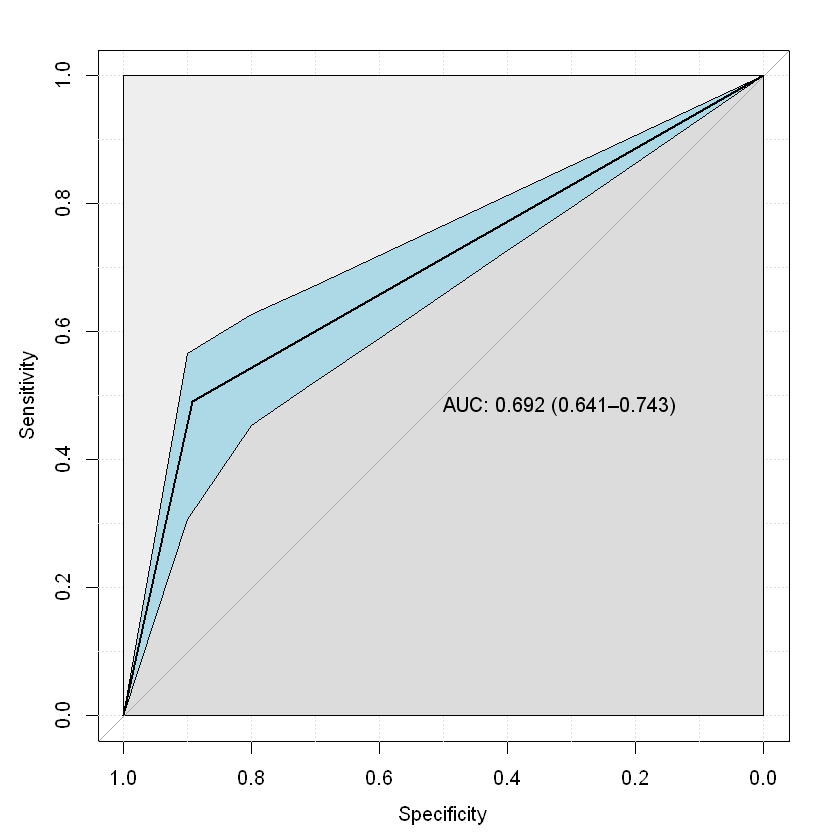

In [35]:
# Plotando curva ROC
curva<- roc(test.data$Outcome,previsoes,
                smoothed = TRUE,
                ci=TRUE, ci.alpha=0.9, stratified=FALSE,
                plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
                print.auc=TRUE, show.thres=TRUE)
ci <- ci.se(curva)
plot(ci, type="shape", col="lightblue")

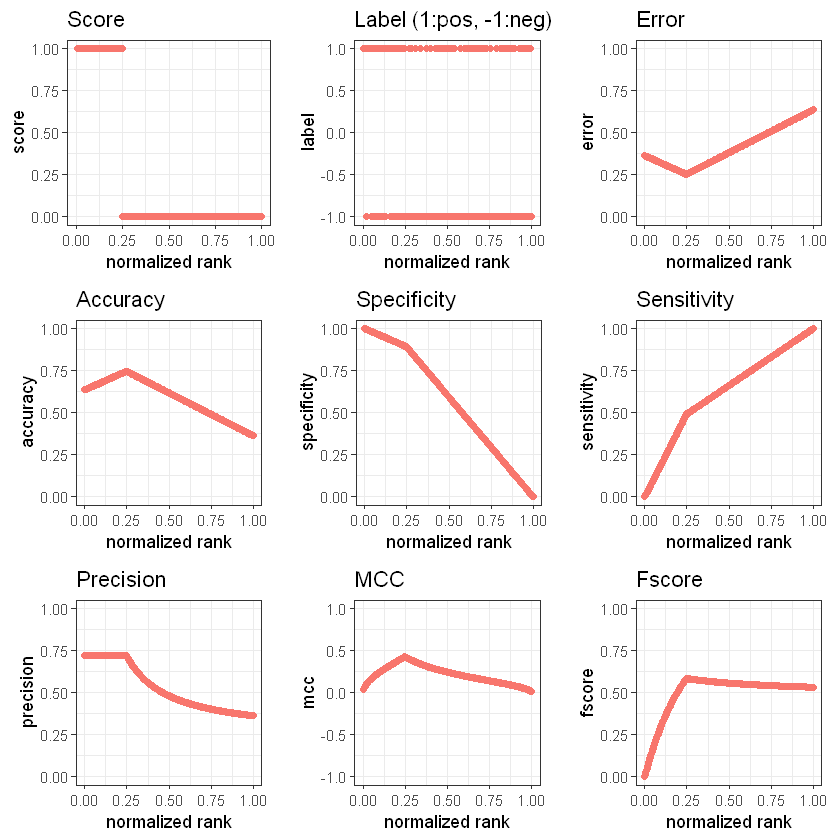

In [50]:
# Gráficos dos aspectos do modelo
aspectos_modelo <- evalmod(scores = previsoes, labels = test.data$Outcome, mode="basic")
autoplot(aspectos_modelo)

### Modelo 2

* No Modelo 2 selecionamos as variáveis mais importantes, são elas: *Glucose*, *BMI*, *Pregnancies* e *DiabetesPedigreeFunction*

In [36]:
# Selecionando as variáveis mais importantes
control <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
model <- train(Outcome~., train.data, method = "glm", trControl = control)
importance <- varImp(model, scale = FALSE)

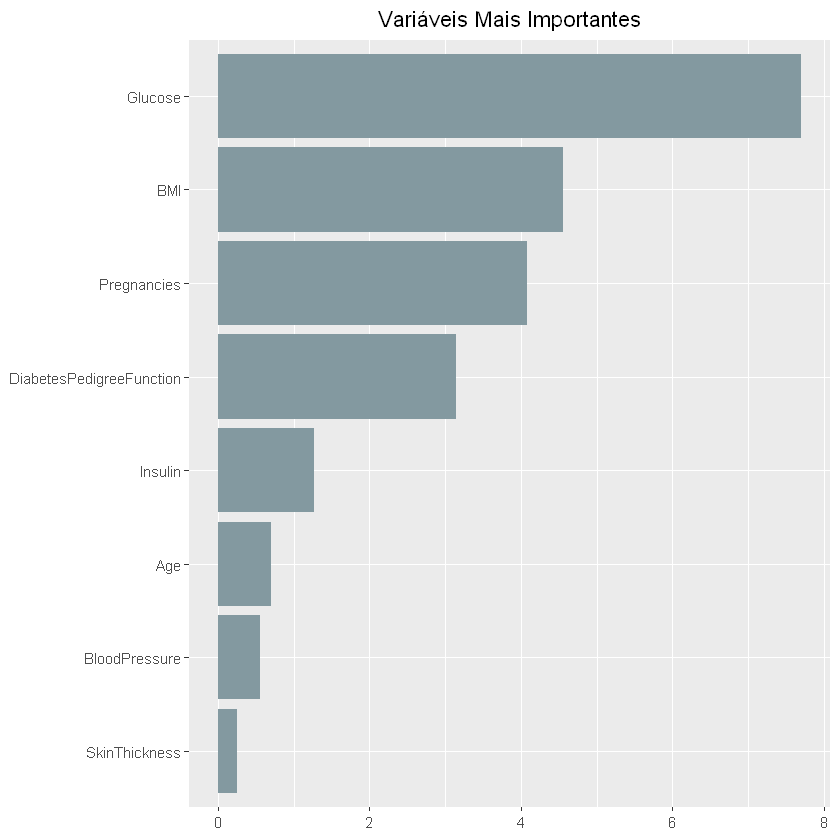

In [37]:
# Plotando variáveis mais importantes
importance %>%
ggplot(aes(importante)) +
geom_col(alpha=.5,fill="lightblue") +
labs(y=NULL,x=NULL,title="Variáveis Mais Importantes") +
theme(plot.title = element_text(hjust = 0.5))

In [38]:
# Modelo 2
modelo_v2 <- glm(Outcome~ Glucose+BMI+Pregnancies+DiabetesPedigreeFunction,
                 train.data, family = "binomial")

In [39]:
# Sumário do Modelo 2
summary(modelo_v2)


Call:
glm(formula = Outcome ~ Glucose + BMI + Pregnancies + DiabetesPedigreeFunction, 
    family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0307  -0.6637  -0.3351   0.6081   2.3597  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -1.0069     0.1340  -7.515 5.69e-14 ***
Glucose                    1.1558     0.1412   8.187 2.67e-16 ***
BMI                        0.7279     0.1425   5.110 3.23e-07 ***
Pregnancies                0.6553     0.1260   5.203 1.96e-07 ***
DiabetesPedigreeFunction   0.4013     0.1299   3.090    0.002 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 589.22  on 459  degrees of freedom
Residual deviance: 398.32  on 455  degrees of freedom
AIC: 408.32

Number of Fisher Scoring iterations: 5


In [40]:
# Avaliando modelo 2
previsoes2 <- predict(modelo_v2, test.data, type = "response")
previsoes2 <- round(previsoes2)

In [41]:
# Confusion Matrix
confusionMatrix(table(data = previsoes2, reference = test.class.var), positive = '1')

Confusion Matrix and Statistics

    reference
data   0   1
   0 174  56
   1  22  56
                                          
               Accuracy : 0.7468          
                 95% CI : (0.6943, 0.7944)
    No Information Rate : 0.6364          
    P-Value [Acc > NIR] : 2.341e-05       
                                          
                  Kappa : 0.4147          
                                          
 Mcnemar's Test P-Value : 0.0001866       
                                          
            Sensitivity : 0.5000          
            Specificity : 0.8878          
         Pos Pred Value : 0.7179          
         Neg Pred Value : 0.7565          
             Prevalence : 0.3636          
         Detection Rate : 0.1818          
   Detection Prevalence : 0.2532          
      Balanced Accuracy : 0.6939          
                                          
       'Positive' Class : 1               
                                          

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Warning message in plot.ci.se(ci, type = "shape", col = "lightblue"):
"Low definition shape."

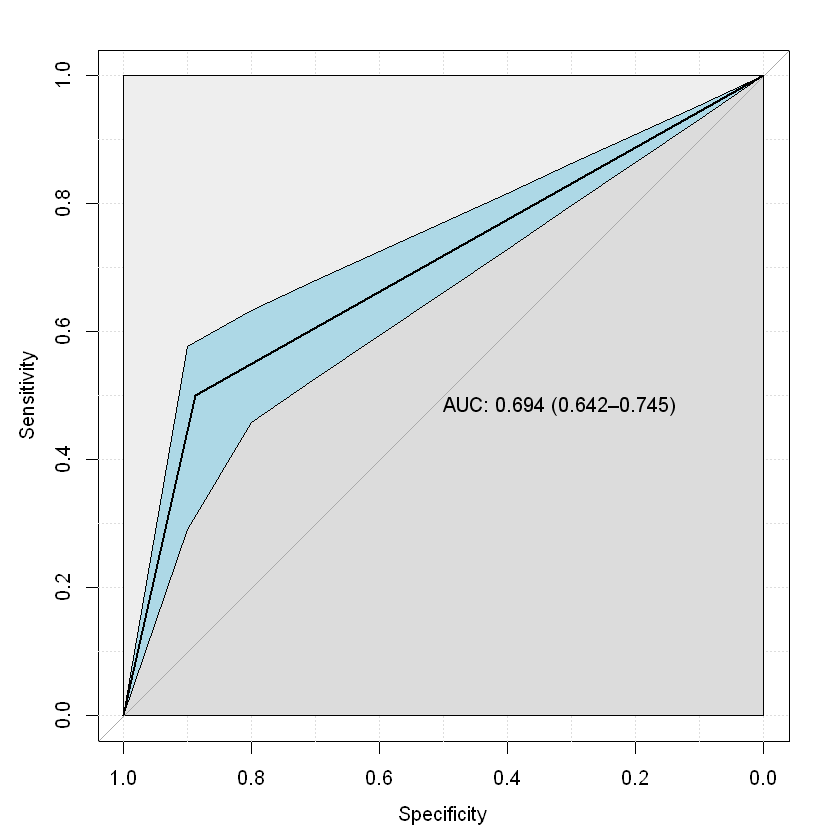

In [42]:
# Plotando curva ROC
curva<- roc(test.data$Outcome,previsoes2,
                smoothed = TRUE,
                ci=TRUE, ci.alpha=0.9, stratified=FALSE,
                plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
                print.auc=TRUE, show.thres=TRUE)
ci <- ci.se(curva)
plot(ci, type="shape", col="lightblue")

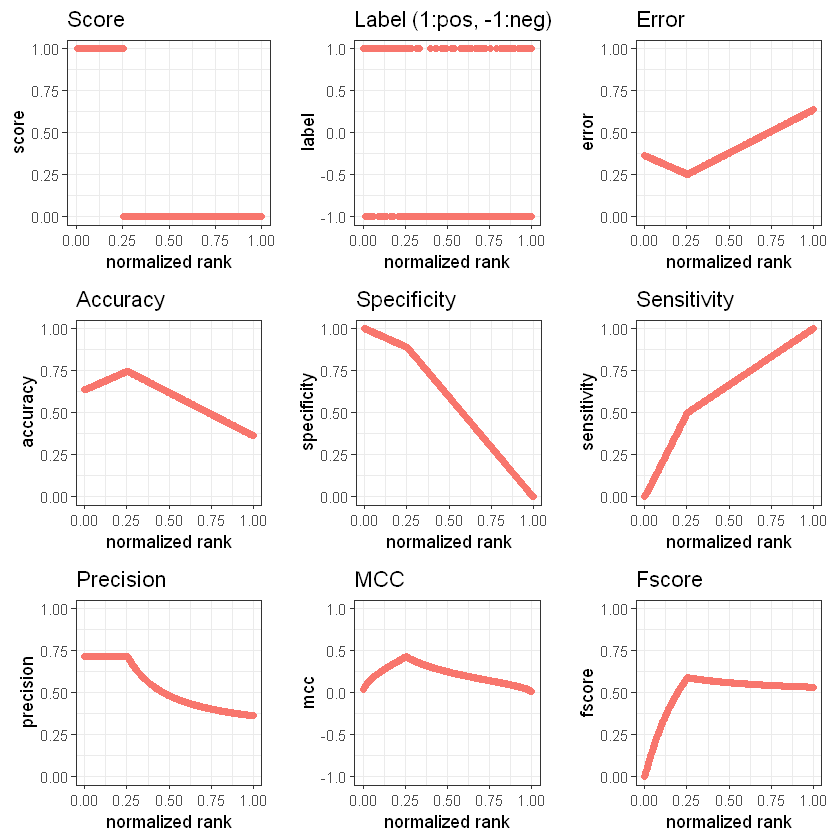

In [43]:
# Gráficos dos aspectos do modelo
aspectos_modelo <- evalmod(scores = previsoes2, labels = test.data$Outcome, mode="basic")
autoplot(aspectos_modelo)

### Modelo 3

* Adicionamos a interação entre as variáveis Insulin e Age

In [44]:
# Modelo 3
modelo_v3 <- glm(Outcome~ Glucose+BMI+Pregnancies+DiabetesPedigreeFunction+Insulin:Age,
                 train.data, family = "binomial")

In [45]:
# Sumário do Modelo 3
summary(modelo_v3)


Call:
glm(formula = Outcome ~ Glucose + BMI + Pregnancies + DiabetesPedigreeFunction + 
    Insulin:Age, family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9213  -0.6412  -0.3395   0.5993   2.4606  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -0.9657     0.1345  -7.181 6.92e-13 ***
Glucose                    1.2096     0.1465   8.259  < 2e-16 ***
BMI                        0.7129     0.1440   4.949 7.45e-07 ***
Pregnancies                0.6439     0.1271   5.064 4.10e-07 ***
DiabetesPedigreeFunction   0.4113     0.1303   3.158  0.00159 ** 
Insulin:Age                0.4298     0.1895   2.269  0.02328 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 589.22  on 459  degrees of freedom
Residual deviance: 392.35  on 454  degrees of freedom
AIC: 404.35

Number of Fisher

In [46]:
# Avaliando modelo 3
previsoes3 <- predict(modelo_v3, test.data, type = "response")
previsoes3 <- round(previsoes3)

In [47]:
# Confusion Matrix
confusionMatrix(table(data = previsoes3, reference = test.class.var), positive = '1')

Confusion Matrix and Statistics

    reference
data   0   1
   0 178  58
   1  18  54
                                          
               Accuracy : 0.7532          
                 95% CI : (0.7012, 0.8004)
    No Information Rate : 0.6364          
    P-Value [Acc > NIR] : 7.690e-06       
                                          
                  Kappa : 0.4227          
                                          
 Mcnemar's Test P-Value : 7.691e-06       
                                          
            Sensitivity : 0.4821          
            Specificity : 0.9082          
         Pos Pred Value : 0.7500          
         Neg Pred Value : 0.7542          
             Prevalence : 0.3636          
         Detection Rate : 0.1753          
   Detection Prevalence : 0.2338          
      Balanced Accuracy : 0.6952          
                                          
       'Positive' Class : 1               
                                          

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Warning message in plot.ci.se(ci, type = "shape", col = "lightblue"):
"Low definition shape."

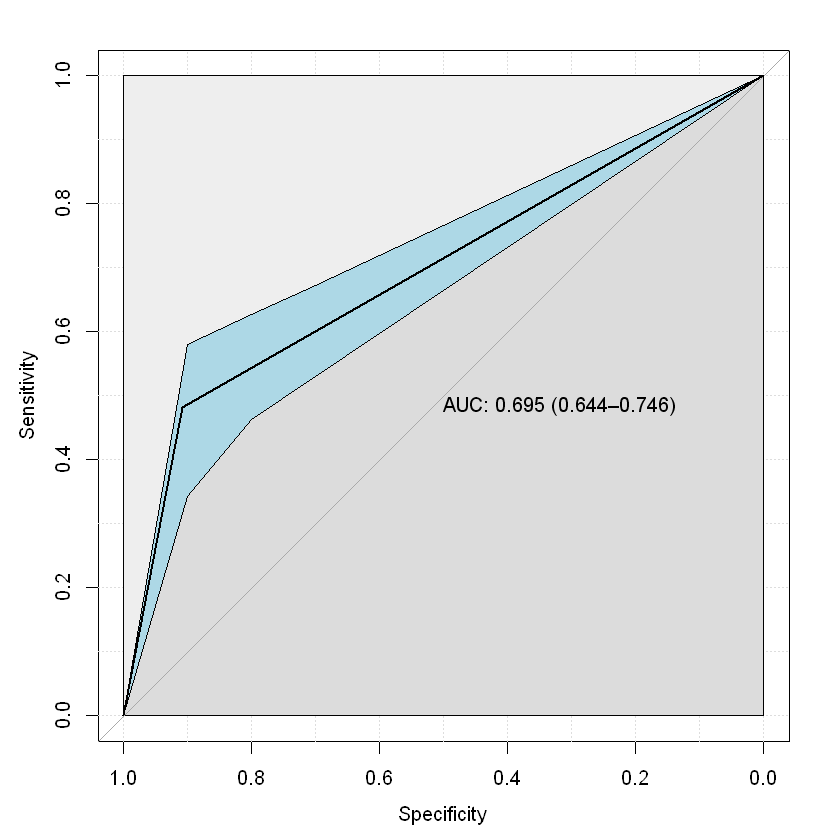

In [48]:
# Plotando curva ROC
curva<- roc(test.data$Outcome,previsoes3,
                smoothed = TRUE,
                ci=TRUE, ci.alpha=0.9, stratified=FALSE,
                plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
                print.auc=TRUE, show.thres=TRUE)
ci <- ci.se(curva)
plot(ci, type="shape", col="lightblue")

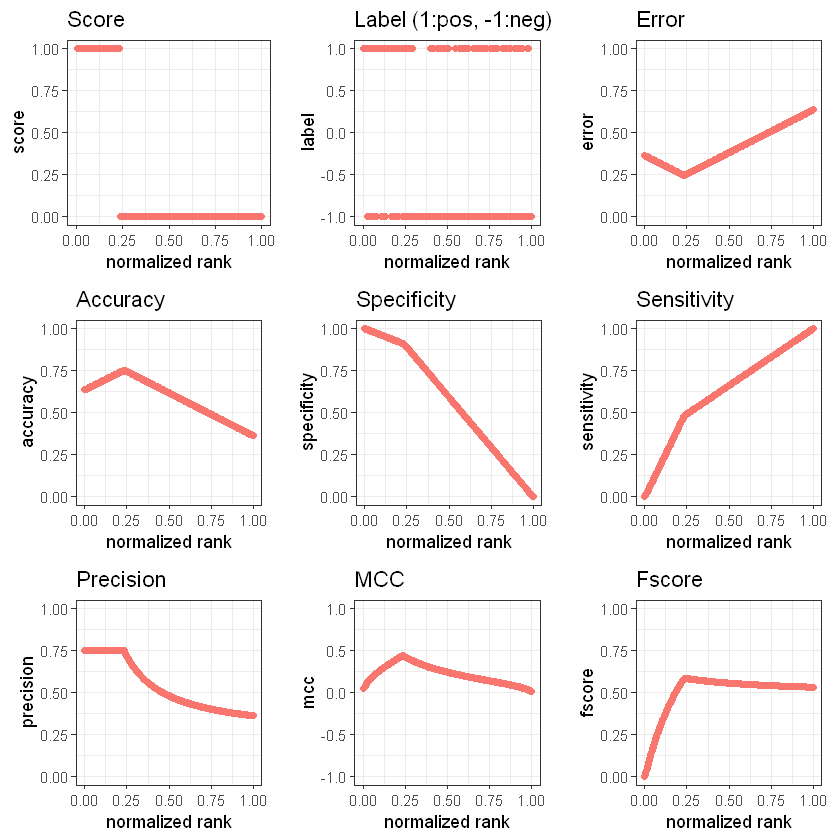

In [49]:
# Gráficos dos aspectos do modelo
aspectos_modelo <- evalmod(scores = previsoes3, labels = test.data$Outcome, mode="basic")
autoplot(aspectos_modelo)

### Resultados

<pre>
              Modelo1   Modelo2    Modelo3
Accuracy:     0.7468    0.7468	 0.7532  
Sensitivity:  0.4911    0.5000	 0.4911      
Specificity:  0.8929	0.8878	 0.9031 
</pre>

DIEGO RAMIREZ <br>
daarfarias@hotmail.com <br>
https://github.com/daarfarias